
Epoch [1/50]


Train Loss: 29.8720, Train Acc: 49.42%
Val Loss: 5.4729, Val Acc: 62.77%

Epoch [2/50]


Train Loss: 3.5014, Train Acc: 83.22%
Val Loss: 0.5168, Val Acc: 94.68%

Epoch [3/50]


Train Loss: 1.5241, Train Acc: 90.91%
Val Loss: 1.5937, Val Acc: 87.23%

Epoch [4/50]


Train Loss: 1.0720, Train Acc: 91.84%
Val Loss: 0.6731, Val Acc: 93.62%

Epoch [5/50]


Train Loss: 0.6639, Train Acc: 94.41%
Val Loss: 0.7605, Val Acc: 93.62%

Epoch [6/50]


Train Loss: 0.5075, Train Acc: 96.27%
Val Loss: 0.0232, Val Acc: 98.94%

Epoch [7/50]


Train Loss: 0.3247, Train Acc: 96.50%
Val Loss: 0.2177, Val Acc: 97.87%

Epoch [8/50]


Train Loss: 0.2098, Train Acc: 97.90%
Val Loss: 0.2148, Val Acc: 96.81%

Epoch [9/50]


Train Loss: 0.0535, Train Acc: 98.60%
Val Loss: 0.0061, Val Acc: 100.00%

Epoch [10/50]


Train Loss: 0.0480, Train Acc: 99.30%
Val Loss: 0.0021, Val Acc: 100.00%

Epoch [11/50]


Train Loss: 0.1385, Train Acc: 98.83%
Val Loss: 0.1818, Val Acc: 98.94%

Epoch [12/50]


Train Loss: 0.2122, Train Acc: 98.60%
Val Loss: 0.3465, Val Acc: 96.81%

Epoch [13/50]


Train Loss: 0.0487, Train Acc: 98.83%
Val Loss: 0.1325, Val Acc: 98.94%

Epoch [14/50]


Train Loss: 0.0332, Train Acc: 99.30%
Val Loss: 0.0000, Val Acc: 100.00%
Early stopping triggered

Best Validation Accuracy: 100.00%


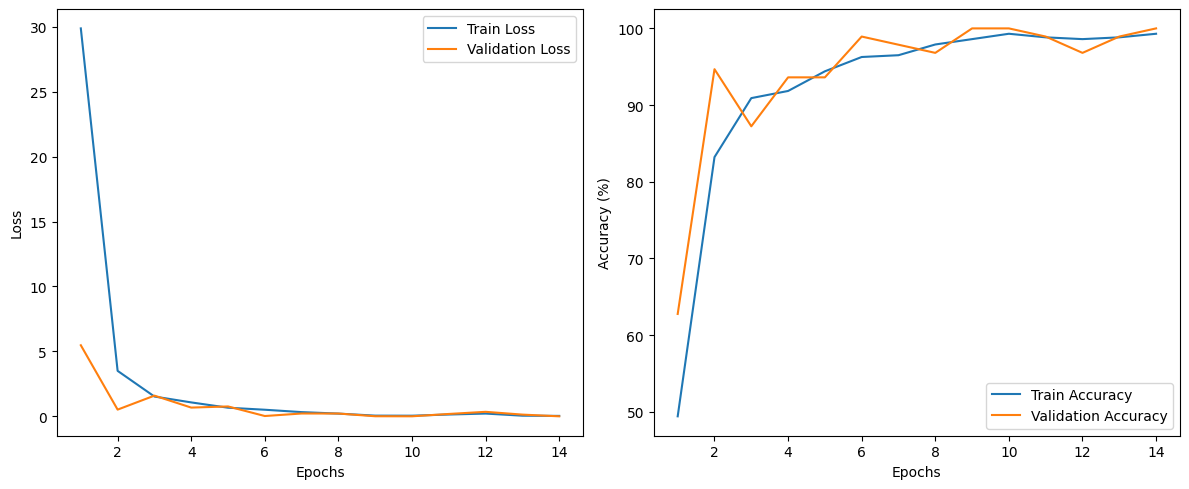


Final Evaluation Report:

              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000        18
           2     1.0000    1.0000    1.0000        18
           3     1.0000    1.0000    1.0000        20
           4     1.0000    1.0000    1.0000        20
           5     1.0000    1.0000    1.0000        18

    accuracy                         1.0000        94
   macro avg     1.0000    1.0000    1.0000        94
weighted avg     1.0000    1.0000    1.0000        94



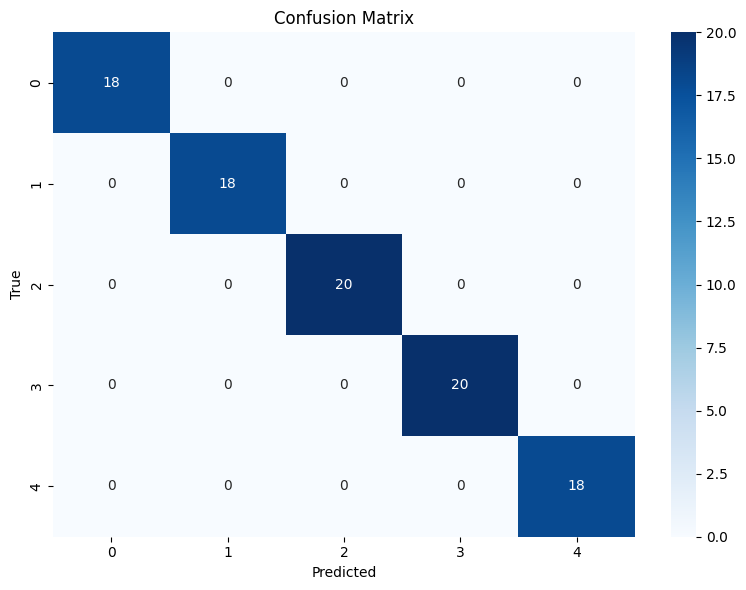


Caricamento del modello migliore...

Esecuzione del test sul dataset di test...

TEST REPORT:

              precision    recall  f1-score   support

    chitarra     1.0000    1.0000    1.0000        18
      flauto     1.0000    1.0000    1.0000        18
  pianoforte     1.0000    1.0000    1.0000        19
       viola     1.0000    1.0000    1.0000        18
     violino     1.0000    1.0000    1.0000        18

    accuracy                         1.0000        91
   macro avg     1.0000    1.0000    1.0000        91
weighted avg     1.0000    1.0000    1.0000        91



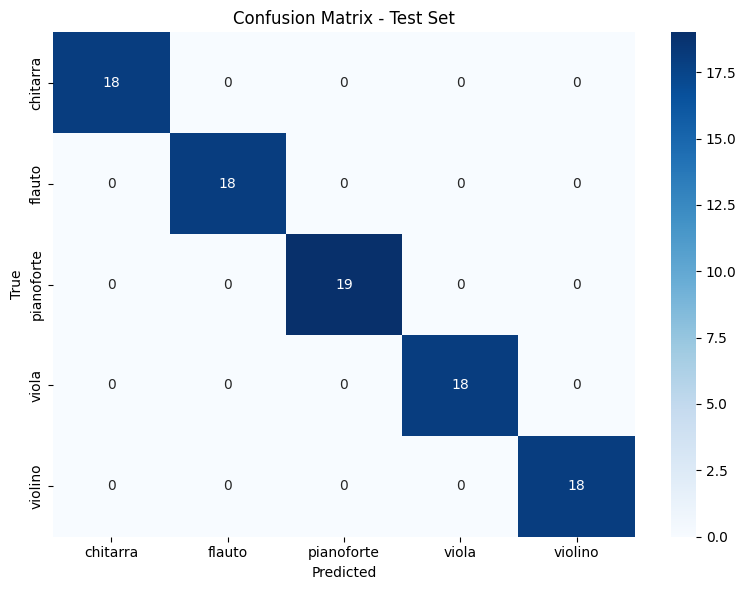

In [2]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader
from utils.train_immagini import train_model
from utils.test_immagini import test_model
from utils.dataset_immagini import ImmaginiDataset
from models.model_immagini import CNNModel

if __name__ == "__main__":
    data_dir = './data'
    batch_size = 32
    img_size = 224
    num_epochs = 50
    learning_rate = 0.001
    patience = 5
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    torch.manual_seed(42)

    train_dataset = ImmaginiDataset(data_dir, split="train", img_size=img_size, shuffle=True)
    val_dataset = ImmaginiDataset(data_dir, split="val", img_size=img_size)
    test_dataset = ImmaginiDataset(data_dir, split="test", img_size=img_size)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    

    model = CNNModel(num_classes=len(train_dataset.classes)).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_model(train_loader, val_loader, model, criterion, optimizer, num_epochs=num_epochs, device=device, patience=patience)

    print("\nCaricamento del modello migliore...")
    model.load_state_dict(torch.load('best_model.pth'))

    print("\nEsecuzione del test sul dataset di test...")
    test_dataset.classes = [c for c in test_dataset.classes if not c.startswith('.')]
    test_model(test_loader, model, device=device, class_names=test_dataset.classes)
